In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
from scipy.interpolate import interp1d

Interpolation

In [2]:
#1.
x = [0.3,0.5,1.2,2.5,3.7,5.8,8.5,9.3,11.0,13.2]
y = [2.8,3.9,4.4,3.5,3.6,4.7,4.9,6.5,5.0,1.0]

a = np.interp(3.0, x, y)
b = interp1d(x, y, kind='cubic')
print(a)
print(b(3.0))

3.5416666666666665
3.420515236049372


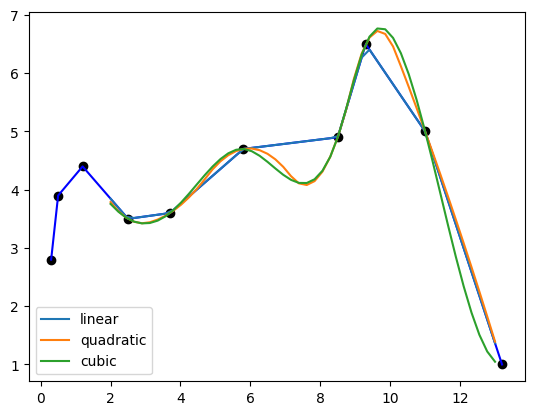

In [3]:
#2.
x = [0.3,0.5,1.2,2.5,3.7,5.8,8.5,9.3,11.0,13.2]
y = [2.8,3.9,4.4,3.5,3.6,4.7,4.9,6.5,5.0,1.0]
xp = np.linspace(2,13,50)

plt.plot(x,y,'o',color='black')
plt.plot(x,y,'-',color='blue')

for kind in ['linear','quadratic','cubic']:
    func = interp1d(x, y, kind=kind)
    yn = func(xp)
    plt.plot(xp, yn, label=kind)

plt.legend(loc='lower left')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


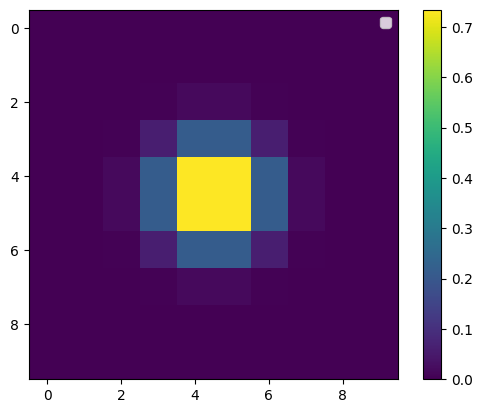

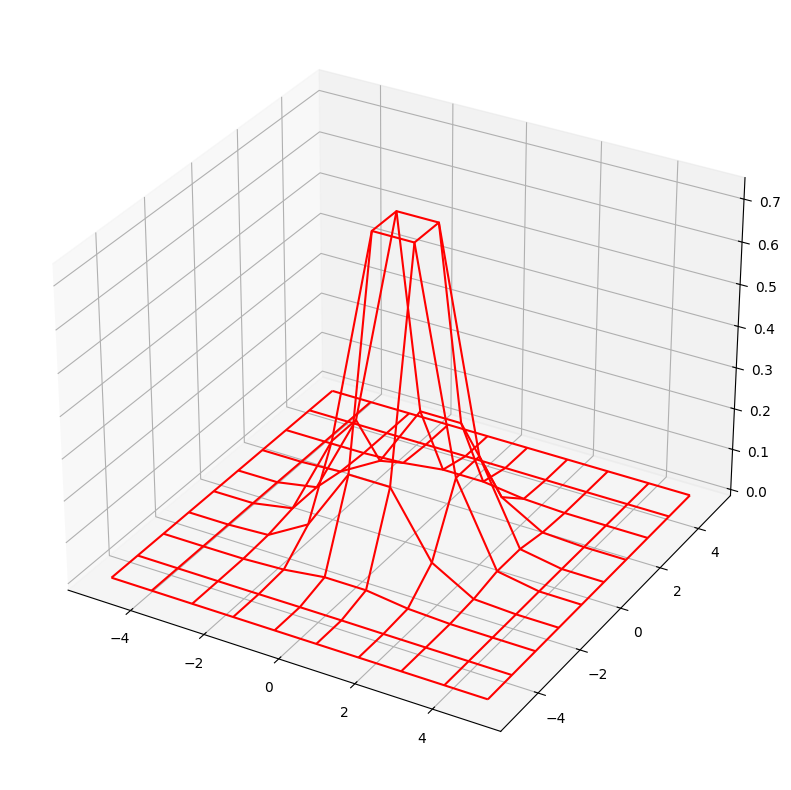

In [4]:
#3.
def f(x,y):
    return np.exp(-(x**2+y**2)/2)

x = np.linspace(-5,5,10)
y = np.linspace(-5,5,10)
xgrid, ygrid = np.meshgrid(x,y)
z = f(xgrid,ygrid)

#2-d projection
plt.imshow(z)
plt.legend()
plt.colorbar()

#3-d projection
plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.plot_wireframe(xgrid, ygrid, z, color='r')

C:\Users\jimin\AppData\Local\Temp\ipykernel_3376\492138128.py:2: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  newfunc = interpolate.interp2d(x, y, z, kind='cubic')
C:\Users\jimin\AppData\Local\Temp\ipykernel_3376\492138128.py:5: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` inst

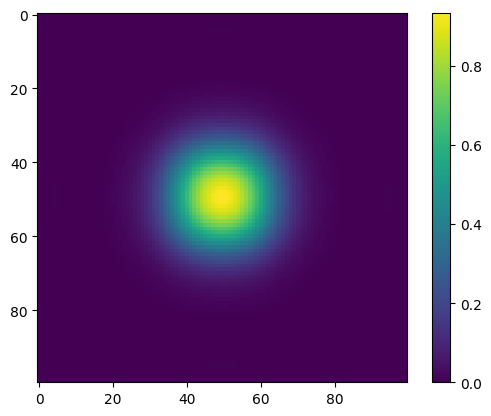

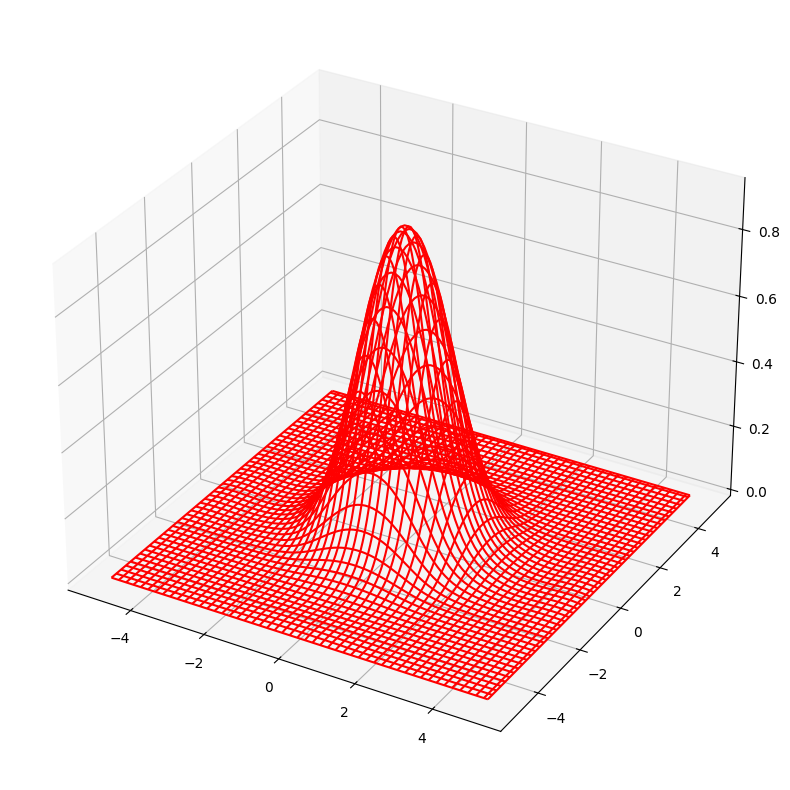

In [5]:
#4.
newfunc = interpolate.interp2d(x, y, z, kind='cubic')
xnew = np.linspace(-5, 5, 100)
ynew = np.linspace(-5, 5, 100)
znew = newfunc(xnew, ynew)

xnewgrid, ynewgrid = np.meshgrid(xnew, ynew)

#2-d projection
plt.imshow(znew) #plt.imshow(znew, cmap=plt.cm.viridis)
plt.colorbar()

#3-d projection
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.plot_wireframe(xnewgrid, ynewgrid, znew, color='r')

Integration

In [6]:
from scipy.integrate import trapz
from scipy.integrate import simps
from scipy.integrate import quad
from scipy.integrate import nquad

In [7]:
#1.
def f(x):
    return np.sin(x)

print(quad(f, 0, np.pi)[0])


2.0


In [8]:
#2.
def f(P_lambda):
    return 2*np.pi*h*c**2/P_lambda*(1./np.exp(h*c/(P_lambda*kB*T-1)))

a = np.exp(1)-9 
b = np.exp(1)-2
T = 5000
h = 6.63*np.exp(1)-34 
c = 3.0*np.exp(1)*8
kB = 1.38*np.exp(1)*-23 

print(quad(f, a, b)[0])

2697534.7427966143


C:\Users\jimin\AppData\Local\Temp\ipykernel_3376\3412022734.py:12: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  print(quad(f, a, b)[0])


In [9]:
#3.
def fs(sigma, T):
    return sigma*T**4

sigma = 5.67e-8
T = 5000

print(fs(sigma, T))

35437500.0


In [10]:
#4.
def my_f(x):
    return np.exp(x)

true_value = np.exp(1)-1

for i in range(11):
    n = 2**i
    def my_trapz(my_f, a, b, n):
        x = np.linspace(a,b,n+1)
        y = my_f(x)

        h = float(b-a)/n

        value = h/2.*(y[0] + 2.0*np.sum(y[1:n]) + y[n])

        return value
    print('n=',n, 'err_r=', np.abs(true_value-my_trapz(my_f, 0, 1, n))/true_value)


n= 1 err_r= 0.08197670686932647
n= 2 err_r= 0.020747041268399154
n= 4 err_r= 0.005202916046949604
n= 8 err_r= 0.001301744375230137
n= 16 err_r= 0.00032549964254174896
n= 32 err_r= 8.137888381617521e-05
n= 64 err_r= 2.034496929992121e-05
n= 128 err_r= 5.0862578466864835e-06
n= 256 err_r= 1.2715654316651854e-06
n= 512 err_r= 3.178914186196405e-07
n= 1024 err_r= 7.947285846704137e-08


random

In [11]:
#1.
def dice_average(x):
    X = np.ones(x)
    for i in range(x):
        dice = np.random.randint(1,7)
        X[i] = dice

    return np.average(X)

dice_average(100)

3.71

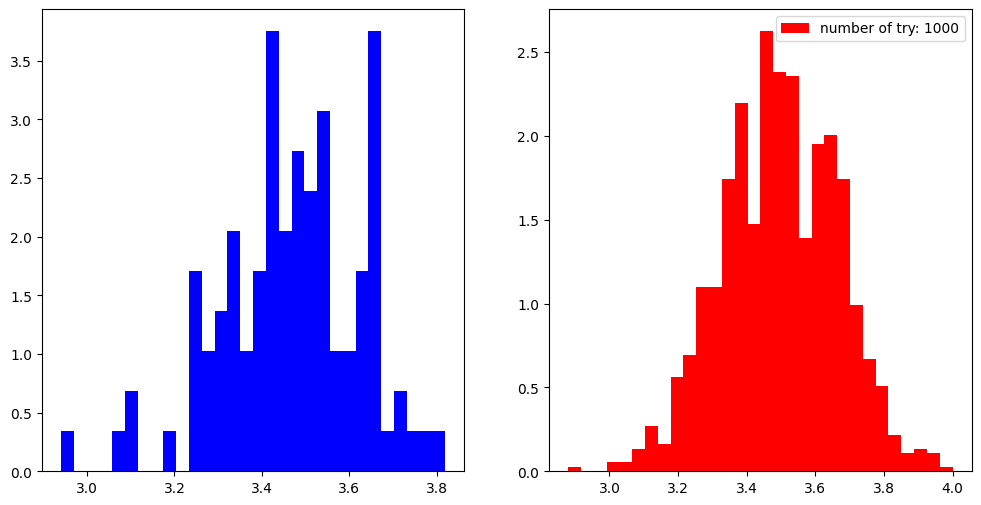

In [12]:
#2.
#100번 호출
avg_arr100 = np.ones(100)

for i in range(100):
    avg_arr100[i] = dice_average(100)

avg_arr1000 = np.ones(1000)

for i in range(1000):
    avg_arr1000[i] = dice_average(100)

plt.figure(figsize=(12,6))
plt.subplot(121)
plt.hist(avg_arr100, bins=30, density=1, color='blue', label='number of try: 100')
plt.subplot(122)
plt.hist(avg_arr1000, bins=30, density=1, color='red', label='number of try: 1000')
plt.legend()
plt.show()


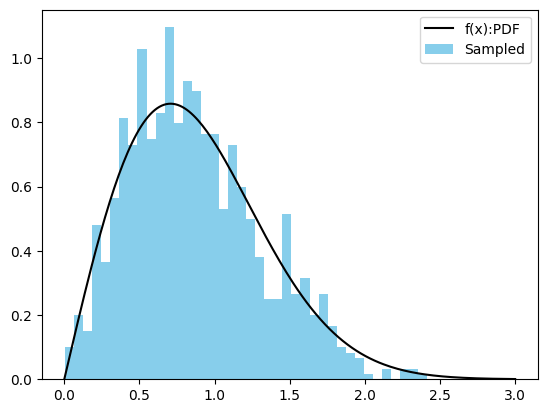

In [13]:
#3. 
def f(x):
    return 2*x*np.exp(-x**2)

n = 200
x = np.linspace(0, 3, n)
y = f(x)

plt.plot(x, y, color='black', label='f(x):PDF')

ynow = np.random.uniform(0,1,1000)
xnow = np.sqrt(np.log(1/(1-ynow)))
count, bins, ignored = plt.hist(xnow, bins=40, density=1, color='skyblue', label='Sampled' )
plt.legend()


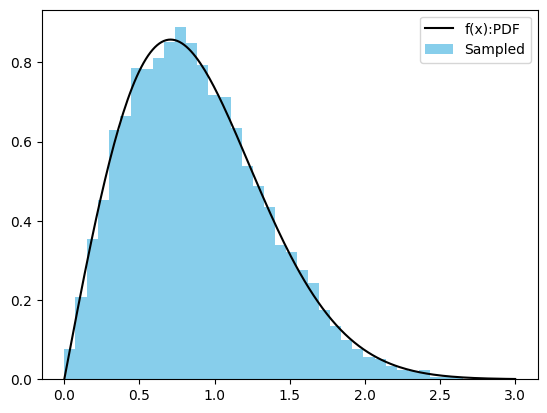

In [14]:
#4.
def f(x):
    return 2*x*np.exp(-x**2)

n = 200
x = np.linspace(0,3,n)
y = f(x)
plt.plot(x,y,'-',color='black', label='f(x):PDF')
plt.legend()

#Cummulative Distribution Function (CDF)
#누적분포함수: 주어진 확률 변수가 특정 값보다 작거나 같은 확률을 나타내는 함수
#적분을 0부터 x까지 적분

ycum = np.zeros(n)
for i in range(n):
    ycum[i] = quad(f, 0.0, x[i])[0] #F(x)

#Normalization -> [0,1]
M = np.max(ycum)
ycum = ycum/M
#ycum을 M으로 나누어 Normalization

#역함수를 구해서 uniform sampling 함수를 넣어야 함.
#함수를 해석학적으로 구하지 못하면 수치를 이용해서 구하셈.
#interpolation(내삽)을 이용해서 구함

n = 10000
X = [] #빈 array를 만들어 xnow가 들어갈 자리를 만들어줌
for i in range(n):
    ynow = np.random.uniform(0,1)
    #inverse function에 넣어줘야 함.
    xnow = np.interp(ynow,ycum,x)
    #numpy.interp(y1, y, x): y,x 두개의 array에서 y1을 넣었을 때 대응되는 x값 구하기
    X.append(xnow)

count, bins2, ignored = plt.hist(X, bins=40, density=1, label='Sampled', color='skyblue')
plt.legend()

Rejection number / Sampling2

Accepted Rate: 29.585 %


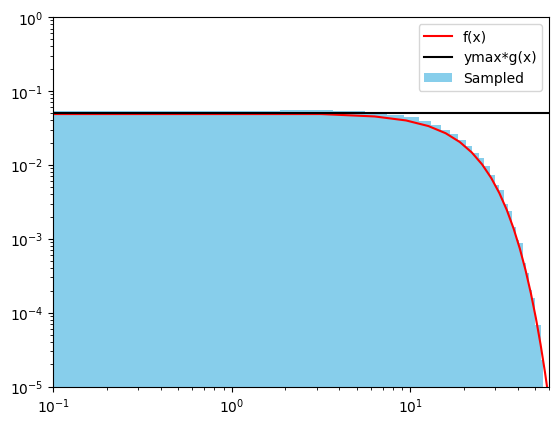

In [15]:
#1. 
def f(x):
    rc = 20.0
    return 1.0/rc*np.exp(-x**2.0/rc**2.0)

rmin = 0.0
rmax = 60.0
n = 20
x = np.linspace(rmin, rmax, n)
y = f(x)
M = np.max(y)

def g(x):
    return np.ones(np.size(x))
    #값은 1로만 지정하기 위해 np.ones
    #np.size(x) x의 크기만큼 모두 1로 변환하기 위해

plt.loglog(x, y, color='red', label='f(x)')
plt.plot(x, M*g(x), color='black', label='ymax*g(x)')
plt.ylim(1e-5, 1.0)
plt.xlim(1e-1, 60.0)
plt.legend()

X = []
n = 80000
for i in range(n):
    xnow = np.random.uniform(rmin, rmax)
    yrand = np.random.uniform(0, M*g(xnow))
    #판단을 해줘야 함. 
    #yrand이 f(xnow)보다 아래에 있으면 accept, 위에 있으면 reject
    if f(xnow) > yrand:
        X.append(xnow)

plt.hist(X, bins=30, density=1, color='skyblue', label='Sampled')
plt.legend(loc='upper right')

#얼만큼의 비율로 accept되었는가?
print('Accepted Rate:', (len(X)/n)*100,'%')

(-15.0, 15.0)

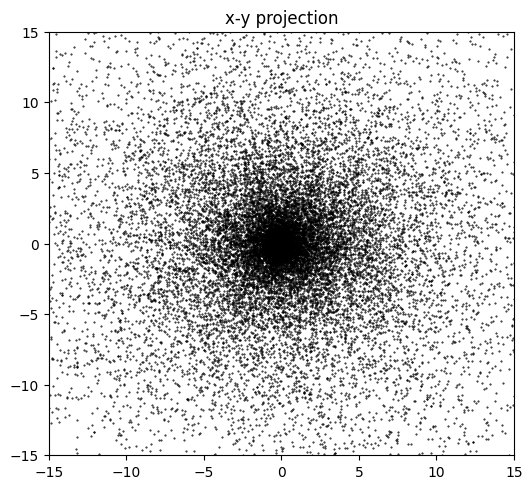

In [17]:
#2.
posx = []
posy = []

for i in range(len(X)):
    phi = np.random.uniform(0,2*np.pi)
    theta = np.random.uniform(0,np.pi)
    posx.append(X[i]*np.sin(theta)*np.cos(phi))
    posy.append(X[i]*np.sin(theta)*np.sin(phi))

plt.figure(figsize=(6,5.5))
plt.scatter(posx,posy,color='black',s=0.2)
plt.title('x-y projection')
plt.xlim(-15,15)
plt.ylim(-15,15)

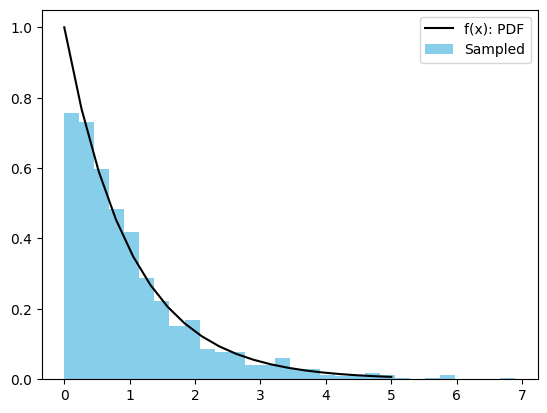

In [19]:
#3.
from scipy.stats import chisquare

nbin = 20
binmin = 0.0
binmax = 5.0
binsize = (binmax-binmin)/nbin
x = np.linspace(binmin, binmax, nbin)
y = np.exp(-x)

plt.plot(x,y,'-',c='black',label='f(x): PDF')
plt.legend()

ndata = 1000
ynow = np.random.uniform(0, 1,ndata)
#inverse function
xnow = -np.log(1.0-ynow)
plt.hist(xnow, bins=30, density=1, label='Sampled', color='skyblue')
plt.legend()

In [20]:
#4.
def f(x):
    return np.exp(-x)

nbin = 20
binmin = 0.0
binmax = 5.0
binsize = (binmax-binmin)/nbin

ndata = 1000
f_exp=[]
for i in range(nbin):
    x1 = binmin + binsize*i
    x2 = binmin + binsize*(i+1)
    value, err = quad(f, x1, x2)
    f_exp.append(value*ndata)
    
hist, bin_edges = np.histogram(xnow, bins = nbin, range=(binmin,binmax))

f_exp = np.array(f_exp)*sum(hist)/sum(f_exp)

print(chisquare(hist, f_exp=f_exp))

Power_divergenceResult(statistic=24.502604007374366, pvalue=0.17757393807868227)


In [ ]:
def Rw(n, color):
    X = np.ones(n)

    for i in range(n):
        w = np.random.randint(0,2)
        X[i] = w

    Y = np.zeros(n)

    for j in range(n):
        if X[j] == 0:
            Y[j] = Y[j-1] + 1

        else:
            Y[j] = Y[j-1] - 1

        np.array(X)
        np.array(Y)
        
    x = np.linspace(0,n,n)
    
    return plt.plot(x, Y, '-', color=color)

Rw(10, 'blue')
Rw(100, 'red')
Rw(500, 'green')

In [ ]:
#9.
for i in range(50):
    Rw(500, 'blue')